# **Data Science Buildables Fellowship**

### **Executive Summary**

The selected code calculates and prints the coefficients of the linear regression model. These coefficients serve as a key output of the model, quantifying the specific relationship between each input variable (e.g., 'Hours Studied', 'Previous Scores') and the target variable, 'Performance Index'. The interpretation explains how a one-unit change in each input variable is predicted to impact the performance index, assuming all other variables remain constant.

In [5]:
# 1: Load the CSV dataset and prepare the data for linear regression.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the CSV file. Please make sure the file is in the same directory.
# You can replace 'student_scores.csv' with your file name if it's different.
try:
    df = pd.read_csv(r'C:\Users\ilaib\OneDrive\Desktop\Student_Performance.csv')
    # Pre-process the 'Extracurricular Activities' column
    df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
except FileNotFoundError:
    print("Error: The CSV file 'student_scores.csv' was not found.")
    print("Please make sure the file is in the same directory as the script.")
    exit()

    print("Dataset loaded successfully.")
print("First 5 rows of the data:")
print(df.head())
print("-" * 50)

First 5 rows of the data:
   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1                 91  
1                                 2                 65  
2                                 2                 45  
3                                 2                 36  
4                                 5                 66  
--------------------------------------------------


In [6]:
# Define features (X) and target variable (y).
# We'll use all columns except 'Final_Score' and 'Performance Index' as features to predict 'Performance Index'.
features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
X = df[features]
y = df['Performance Index']

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data preparation complete. Training and testing sets created.")
print("-" * 50)

Data preparation complete. Training and testing sets created.
--------------------------------------------------


In [7]:
# 2: Implement and fit the linear regression model.
model = LinearRegression()
model.fit(X_train, y_train)
print("Linear Regression model trained successfully.")
print("-" * 50)

Linear Regression model trained successfully.
--------------------------------------------------


In [8]:
# 3: Use the trained model to predict the target variable on the test set.
y_pred = model.predict(X_test)
print("Predictions on the test set have been generated.")
print("-" * 50)

Predictions on the test set have been generated.
--------------------------------------------------


In [10]:
# 4: Calculate the Mean Squared Error (MSE) on the test set.
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print("-" * 50)

Mean Squared Error (MSE): 4.08
--------------------------------------------------


In [11]:
# 5: Calculate the R-squared value on the test set.
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.2f}")
print("-" * 50)

R-squared (R2) Score: 0.99
--------------------------------------------------


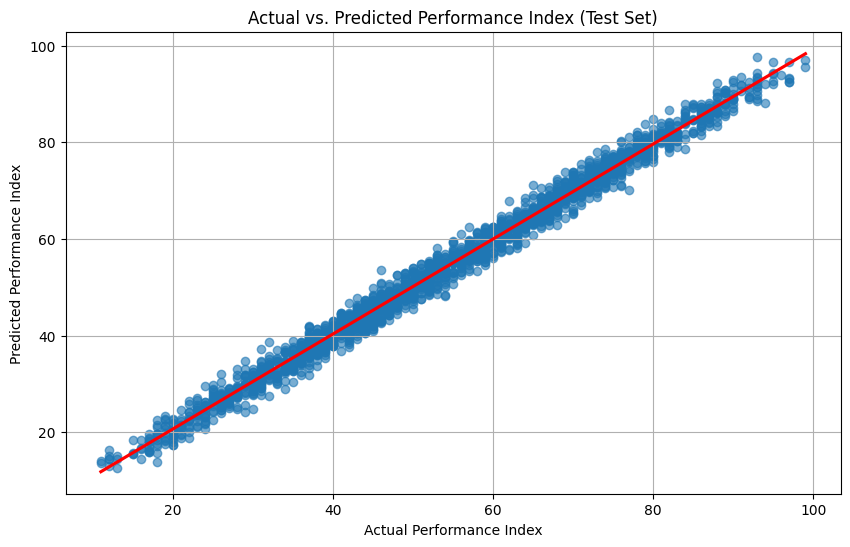

In [12]:
# 6 & 7: Create plots for visual assessment.
# Plot of predicted vs. actual values with a regression line.
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Actual vs. Predicted Performance Index (Test Set)')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.grid(True)
plt.show()


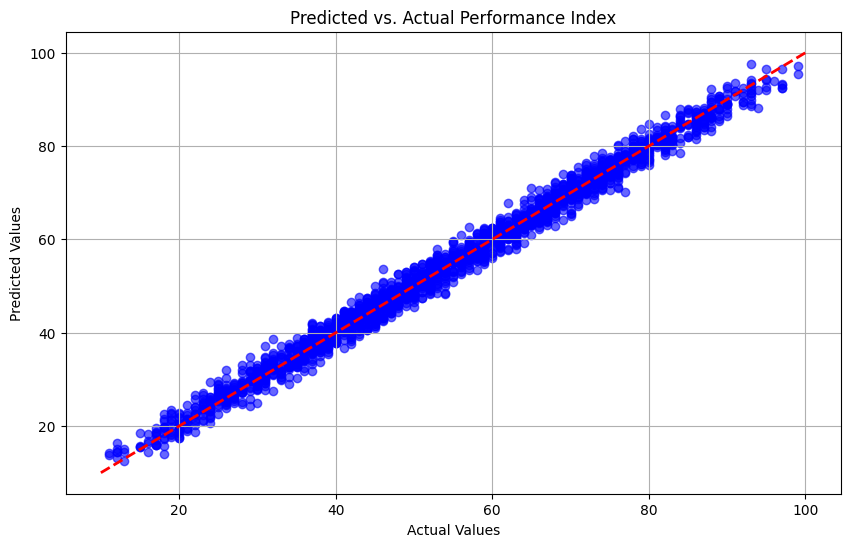

Plots generated successfully. A diagonal line represents a perfect fit.
--------------------------------------------------


In [13]:
# Scatter plot of predicted vs. actual values with a perfect fit line.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Predicted vs. Actual Performance Index')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()
print("Plots generated successfully. A diagonal line represents a perfect fit.")
print("-" * 50)

In [14]:
# 8: Interpret the coefficients of the model.
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Model Coefficients:")
print(coefficients)
print("\nInterpretation of Coefficients:")
print(f"The coefficient for 'Hours Studied' is {model.coef_[0]:.2f}. For every additional hour studied, the predicted performance index increases by approximately {model.coef_[0]:.2f} points.")
print(f"The coefficient for 'Previous Scores' is {model.coef_[1]:.2f}. A one-point increase in the previous score predicts a change of {model.coef_[1]:.2f} in the performance index.")
print(f"The coefficient for 'Extracurricular Activities' is {model.coef_[2]:.2f}. Students who participate in extracurricular activities (represented by a value of 1) are predicted to have a performance index that is {model.coef_[2]:.2f} points higher or lower than those who do not.")
print(f"The coefficient for 'Sleep Hours' is {model.coef_[3]:.2f}. For every additional hour of sleep, the predicted performance index changes by {model.coef_[3]:.2f} points.")
print(f"The coefficient for 'Sample Question Papers Practiced' is {model.coef_[4]:.2f}. Each additional paper practiced is associated with a change of {model.coef_[4]:.2f} in the predicted performance index.")
print(f"\nThe intercept of the model is approximately {model.intercept_:.2f}. This is the predicted performance index when all feature values are zero.")


Model Coefficients:
                                  Coefficient
Hours Studied                        2.852484
Previous Scores                      1.016988
Extracurricular Activities           0.608617
Sleep Hours                          0.476941
Sample Question Papers Practiced     0.191831

Interpretation of Coefficients:
The coefficient for 'Hours Studied' is 2.85. For every additional hour studied, the predicted performance index increases by approximately 2.85 points.
The coefficient for 'Previous Scores' is 1.02. A one-point increase in the previous score predicts a change of 1.02 in the performance index.
The coefficient for 'Extracurricular Activities' is 0.61. Students who participate in extracurricular activities (represented by a value of 1) are predicted to have a performance index that is 0.61 points higher or lower than those who do not.
The coefficient for 'Sleep Hours' is 0.48. For every additional hour of sleep, the predicted performance index changes by 0.48 points